# Introduction à la librairie Keras

Dans le TP précédent, vous avez implémenté l'apprentissage et l'inférence d'un réseau de neurones. En pratique, il est plus courant de faire appel à des librairies qui masquent la complexité de ces algorithmes (notamment le calcul des gradients, réalisé par différentiation automatique). Dans la suite, nous utiliserons pour les TPs la librairie ***Keras***. Dans un premier temps, pour ce TP nous allons détailler sur un exemple simple (le même que pour le TP précédent) les différentes étapes à mettre en place pour entraîner un réseau à l'aide de cette librairie.

在上一个TP中，我们已经实现了神经网络学习和推理。 在TP中，更常见的是使用掩盖这些算法复杂性的库（特别是通过自动微分执行的梯度计算）。 在下文中，我们将使用 **Keras** 库进行实验。 首先，对于本实验，我们将详细介绍一个简单的示例（与之前的实验相同）设置使用此库训练网络的不同步骤。

## Exemple de classification simple
## 举例: 简单的分类器

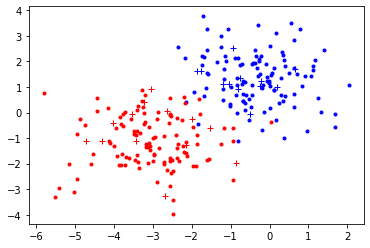

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 

# Génération des données 
# 生成数据集
x, y = datasets.make_blobs(n_samples=250, n_features=2, centers=2, center_box=(- 3, 3), random_state=1)
# Partitionnement des données en apprentissage et test
# 训练和测试中的数据划分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# Affichage des données d'apprentissage
# 显示训练的数据
plt.plot(x_train[y_train==0,0], x_train[y_train==0,1], 'b.')
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1], 'r.')

# Affichage des données de test
# 显示测试的数据
plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle, auquel on va ensuite ajouter les différentes couches, dans l'ordre
# 模型的定义，然后我们将按顺序添加不同的Layer
# NB: c'est exactement ce que nous avons implémenté avec le perceptron multicouche dans le
# 这正是我们使用多层感知器MLP实现的
# TP précédent ! 
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2)) # input_dim indique la dimension de la couche d'entrée, ici 2
# affiche un résumé du modèle
# 显示模型的简介
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

# Définition de l'optimiseur
# 优化器的定义

# On choisit la descente de gradient stochastique, avec un taux d'apprentissage de 0.1
# 我们选用 随机梯度下降SGD，学习率为0.1
sgd = optimizers.SGD(learning_rate=0.1)

# On définit ici, pour le modèle introduit plus tôt, l'optimiseur choisi, la fonction de perte (ici
# l'entropie croisée binaire pour un problème de classification binaire) et les métriques que l'on veut observer pendant
# l'entraînement. La précision (accuracy) est un indicateur plus simple à interpréter que l'entropie croisée.
# 我们在这里为前面介绍的模型定义选择的优化器、损失函数（这里是二元分类问题的二元交叉熵）和我们希望在训练期间观察的指标: 
# 准确度accuracy是一个比交叉熵更容易理解的指标。
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle avec des mini-batchs de taille 20, sur 15 epochs. 
# Le paramètre validation_split signifie qu'on tire aléatoirement une partie des données
# (ici 20%) pour servir d'ensemble de 
# 在15个epoch中使用大小为 20 的 mini-batch 进行模型训练。
# validation_split 参数意味着我们随机选择一部分数据（这里是 20%）作为验证集
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=20)

Epoch 1/15
9/9 [==============================] - 3s 41ms/step - loss: 1.2016 - accuracy: 0.2278 - val_loss: 0.5770 - val_accuracy: 0.6667
Epoch 2/15
9/9 [==============================] - 0s 8ms/step - loss: 0.4295 - accuracy: 0.8667 - val_loss: 0.4063 - val_accuracy: 0.8444
Epoch 3/15
9/9 [==============================] - 0s 7ms/step - loss: 0.3026 - accuracy: 0.9333 - val_loss: 0.3402 - val_accuracy: 0.8889
Epoch 4/15
9/9 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.9444 - val_loss: 0.3034 - val_accuracy: 0.9111
Epoch 5/15
9/9 [==============================] - 0s 6ms/step - loss: 0.2140 - accuracy: 0.9500 - val_loss: 0.2792 - val_accuracy: 0.9111
Epoch 6/15
9/9 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9500 - val_loss: 0.2618 - val_accuracy: 0.9111
Epoch 7/15
9/9 [==============================] - 0s 6ms/step - loss: 0.1772 - accuracy: 0.9556 - val_loss: 0.2483 - val_accuracy: 0.9111
Epoch 8/15
9/9 [=================

La cellule suivante introduit un code permettant de visualiser la frontière de décision du modèle appris. 

以下为可视化学习模型的决策边界的代码。

In [ ]:
import numpy as np
def print_decision_boundaries(model, x, y):
  dx, dy = 0.1, 0.1
  y_grid, x_grid = np.mgrid[slice(np.min(x[:,1]), np.max(x[:,1]) + dy, dy),
                  slice(np.min(x[:,0]), np.max(x[:,0]) + dx, dx)]


  x_gen = np.concatenate((np.expand_dims(np.reshape(x_grid, (-1)),1),np.expand_dims(np.reshape(y_grid, (-1)),1)), axis=1)
  z_gen = model.predict(x_gen).reshape(x_grid.shape)

  z_min, z_max = 0, 1

  c = plt.pcolor(x_grid, y_grid, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)
  plt.colorbar(c)
  plt.plot(x[y==0,0], x[y==0,1], 'r.')
  plt.plot(x[y==1,0], x[y==1,1], 'b.')
  plt.show()

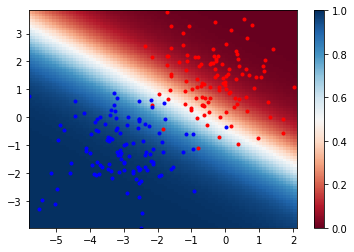

In [ ]:
print_decision_boundaries(model, x_train, y_train)

## Exemple de classification plus "complexe"
## 举例: 稍微复杂一些的分类器

Pour manipuler un peu la librairie, voici un second problème légèrement plus complexe. A vous de réutiliser les cellules précédentes pour mettre en place un réseau permettant de résoudre ce problème.

为了更好的理解，这里有第二个稍微复杂的问题。 您可以重用以前的代码块(Cell)来建立一个网络来解决这个问题。

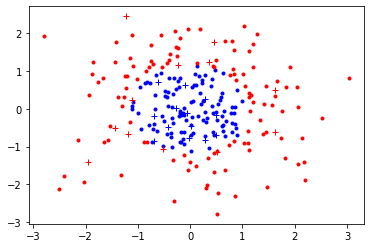

In [ ]:
x, y = datasets.make_gaussian_quantiles(n_samples=250, n_features=2, n_classes=2, random_state=1)
# Partitionnement des données en apprentissage et test
# 训练和测试中的数据划分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# Affichage des données d'apprentissage
# 显示训练的数据
plt.plot(x_train[y_train==0,0], x_train[y_train==0,1], 'b.')
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1], 'r.')

# Affichage des données de test
# 显示测试的数据
plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')


plt.show()

# Classification d'images de chiens et de chats
# 关于喵星人和汪星人图片的分类器

Dans la suite du TP, on s'intéresse au problème simple (en apparence) de reconnaître des chiens et des chats dans des images.

在剩下的实验中，我们将研究识别图像中的狗和猫这一（看似）简单的问题。

<center> <img src="https://drive.google.com/uc?id=11W1SmzrBhL8vyzPCjSkZfHWnxb7kByi5" style="width:1000;height:550px;"></center>
<caption><center><b> Figure 1 : Quelques images de la base de données </b></center></caption>

Pour cela nous allons utiliser une base de données de 4000 images, réparties en 2000 images d'apprentissage, 1000 images de validation, et 1000 images de test. Compte-tenu de la variabilité possible des représentations de chiens et chats, cette base de données est d'une taille assez réduite et le problème est complexe. Il correspond bien aux problèmes que nous pouvons rencontrer dans la réalité, lorsque les données sont souvent difficiles à obtenir.

为此，我们将使用一个包含 4000 个图像的数据库，分为 2000 个训练图像数据、1000 个验证图像数据和 1000 个测试图像数据。 考虑到狗和猫的在图像里形态各异，这个数据库非常小，问题也很复杂。 当数据通常难以获得时, 它很好地对应了我们在现实世界中可能遇到的问题。


Il faut définir une résolution commune à toutes les images, qui sera donc la dimension passée en entrée au réseau de neurones. Pour commencer et simplifier le problème, vous pouvez d'abord considérer des images de taille $64 \times 64$ ; plus tard, lorsque vos réseaux fonctionneront bien, nous pourrons envisager d'augmenter cette résolution pour améliorer les performances.  

有必要定义所有图像拥有相同的分辨率，因此这将是作为输入传递给神经网络的维度。 为了开始和简化问题，您可以首先考虑大小为 $64 \times 64$ 的图像； 稍后，当我们的网络运行良好时，我们可能会考虑增加此分辨率以提高性能。

In [ ]:
IMAGE_SIZE = 64
CLASSES = ['cat', 'dog']

## Chargement des données
## 加载数据

La base de données est à télécharger depuis Git. Ne passez pas trop de temps à regarder les cellules suivantes (mais exécutez les !).

该数据集将从 Git 下载。

In [ ]:
!git clone https://github.com/axelcarlier/iam.git
path = "./iam/tp3/"

Cloning into 'iam'...
remote: Enumerating objects: 4016, done.
remote: Counting objects: 100% (4016/4016), done.
remote: Compressing objects: 100% (4013/4013), done.
remote: Total 4016 (delta 0), reused 4016 (delta 0), pack-reused 0
Receiving objects: 100% (4016/4016), 20.13 MiB | 13.09 MiB/s, done.


Chargement des données dans des tenseurs $x$ et $y$ de dimensions respectives $(N, 64, 64, 3)$ et $(N, 1)$, où $N$ désigne le nombre d'éléments de l'ensemble considéré (apprentissage, validation, ou test).

将数据加载到各自维度 $(N, 64, 64, 3)$ 和 $(N, 1)$ 的张量 $x$ 和 $y$中, 其中$N$ 表示所考虑的集合（训练、验证或测试）的元素数量。。

In [ ]:
import glob
import PIL
from PIL import Image
import numpy as np

def load_data(path, classes, image_size=64):

  # Liste les fichiers présents dans le dossier path
  # 列出路径文件夹中的文件
  file_path = glob.glob(path)
  
  # Initialise les structures de données
  # 初始化数据结构
  x = np.zeros((len(file_path), image_size, image_size, 3))
  y = np.zeros((len(file_path), 1))

  for i in range(len(file_path)):
    # Lecture de l'image
    # 读取图片
    img = Image.open(file_path[i])
    # Mise à l'échelle de l'image
    # 图像缩放
    img = img.resize((image_size,image_size), Image.ANTIALIAS)
    # Remplissage de la variable x
    # 填充变量 x
    x[i] = np.asarray(img)

    img_path_split = file_path[i].split('/')
    img_name_split = img_path_split[-1].split('.')
    class_label = classes.index(img_name_split[-3])
    
    y[i] = class_label

  return x, y

x_train, y_train = load_data('./iam/tp3/train/*', CLASSES, image_size=IMAGE_SIZE)
x_val, y_val = load_data('./iam/tp3/validation/*', CLASSES, image_size=IMAGE_SIZE)
x_test, y_test = load_data('./iam/tp3/test/*', CLASSES, image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
# 通过除以 255 像素值对输入进行归一化。
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

### Visualisation des images
### 图像可视化

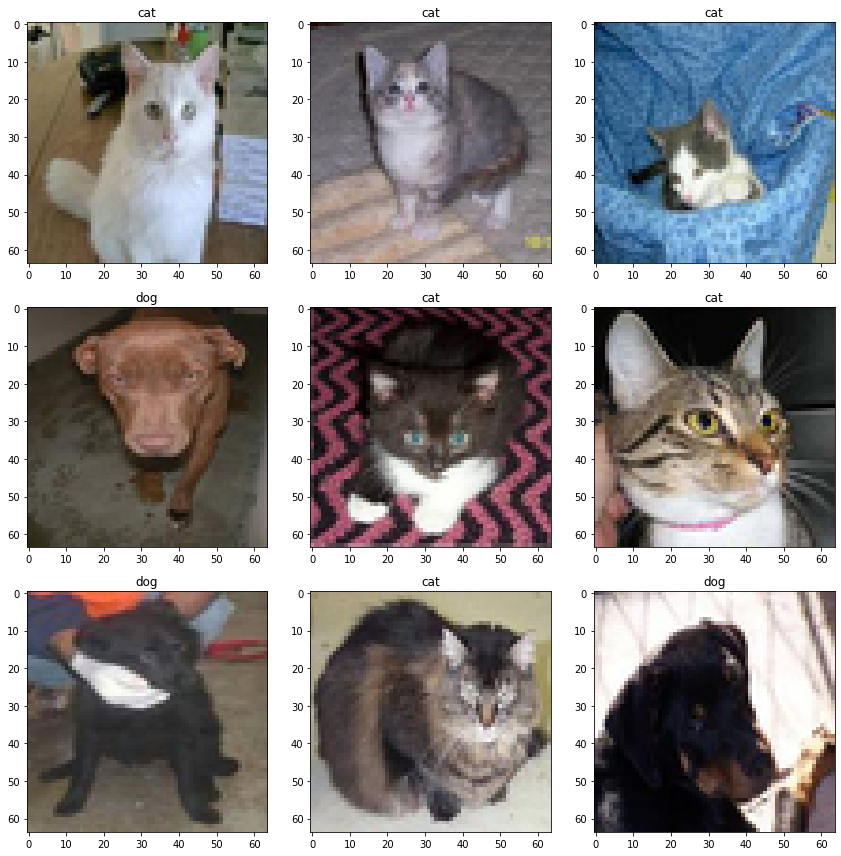

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Randomisation des indices et affichage de 9 images alétoires de la base d'apprentissage
# 索引随机化并显示训练库的9张随机图像
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.title(CLASSES[int(y_train[i])])
    plt.imshow(x_train[i])
plt.tight_layout()
plt.show()

  ## Première approche : réseau convolutif de base
  ## 第一种方法：基本卷积网络

Les images ont toutes été redimensionnées en $64 \times 64$. 
Vous devez définir un réseau de neurones convolutif en suivant ce schéma por la base convolutive : 

图像尺寸全部调整为 $64 \times 64$。我们必须定义一个如下图所示的基础卷积神经网络：

<center> <img src="https://drive.google.com/uc?id=1bwXaIgO-pKJGs6fVaX0IrLbFbUAlTvNM" style="width:800;height:400px;"></center>
<caption><center><b> Figure 2: Vue de l'architecture à implémenter </b></center></caption>

Ce réseau alterne dans une première phase les couches de convolution et de Max Pooling (afin de diviser à chaque fois la dimension des tenseurs par 2). 

该网络在第一阶段交替使用卷积层和最大池化层（以便每次将张量的维度除以 2）。

La première couche comptera 32 filtres de convolution, la seconde 64, la troisième 96 et la 4e 128. Enfin, avant la couche de sortie, vous ajouterez une couche dense comptant 512 neurones. Vous aurez donc construit un réseau à 6 couches, sorte de version simplifiée d'AlexNet.

第一层将有 32 个 conv. filter, 第二层 64 个，第三层 96 个，第四层 128 个。最后，在输出层之前，我们将添加一个具有 512 个神经元的全联接层。 因此，我们将构建一个 6 层网络，这是 AlexNet 的一种简化版本。

Pour construire ce réseau, vous pouvez utiliser les fonctions Conv2D, Maxpooling2D, et Flatten de Keras.

要构建这个网络，可以使用 Keras 的 Conv2D、Maxpooling2D 和 Flatten 函数。


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# A COMPLETER
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 丢弃率, 防止过拟合

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 防止过拟合

model.add(Conv2D(96, (3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 防止过拟合

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 防止过拟合

# "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
# 张量的“扁平化”（矢量化）以允许将其连接到全链接层
model.add(Flatten())
model.add(Dense(512, activation='relu'))   # 全链接层
model.add(Dense(1, activation='sigmoid'))   # 出口层

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 96)        

### Entrainement
### 训练

Pour l'entraînement, vous pouvez utiliser directement les hyperparamètres suivants.

训练过程中，我们可以直接使用以下超参数。

In [ ]:
from tensorflow.keras import optimizers

# COMPLETER LA FONCTION DE COUT A UTILISER
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

... puis lancer l'entraînement. **Attention : si jamais vous voulez relancer l'entraînement, il faut réinitialiser les poids du réseau. Pour cela il faut re-exécuter les cellules précédentes à partir de la définition du réseau !** Sinon vous risquez de repartir d'un entraînement précédent (qui s'est éventuellement bien, ou mal déroulé) et mal interpréter votre nouvel entraînement.

...然后开始训练。 **警告：如果我们想重新开始训练，则必须重置网络。为此，我们必须重新执行先前的网络定义** 否则，我们可能会从先前的训练过的模型开始。

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=10)

Epoch 1/10
200/200 [==============================] - 10s 16ms/step - loss: 0.6936 - accuracy: 0.5135 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6777 - accuracy: 0.5755 - val_loss: 0.6611 - val_accuracy: 0.6090
Epoch 3/10
200/200 [==============================] - 3s 14ms/step - loss: 0.6233 - accuracy: 0.6665 - val_loss: 0.7917 - val_accuracy: 0.5400
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.5803 - accuracy: 0.6960 - val_loss: 0.6194 - val_accuracy: 0.6550
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.5287 - accuracy: 0.7420 - val_loss: 0.6317 - val_accuracy: 0.6790
Epoch 6/10
200/200 [==============================] - 3s 14ms/step - loss: 0.4731 - accuracy: 0.7735 - val_loss: 0.6446 - val_accuracy: 0.6790
Epoch 7/10
200/200 [==============================] - 3s 15ms/step - loss: 0.4059 - accuracy: 0.8075 - val_loss: 0.6529 - val_accuracy: 0.676

### Analyse des résultats du modèle
### 分析模型结果

Les quelques lignes suivantes permettent d'afficher l'évolution des métriques au cours de l'entraînement, sur les ensembles d'apprentissage et de validation.

接下来的函数用于在训练集和验证集上显示正确率, 损失率等指标。

In [ ]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

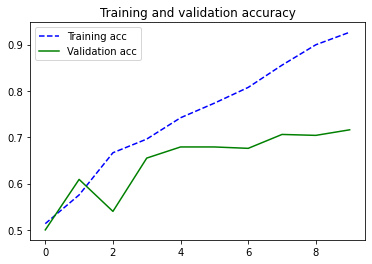

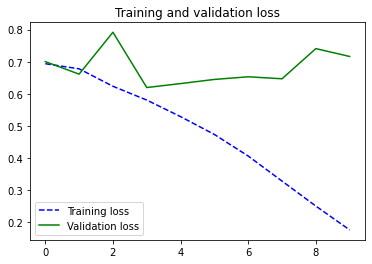

In [ ]:
plot_training_analysis()

### Correction du surapprentissage
### 修复过拟合

Vous devriez reconnaître le problème auquel vous avez affaire : **le surapprentissage**. Ce problème est classique dès lors que l'on travaille sur des bases de données de taille réduite en apprentissage profond.
 En effet, le réseau que vous avez créé compte normalement (si vous avez suivi les indications) plus de trois millions de paramètres. Le problème que vous essayez de résoudre pendant l'entraînement consiste à établir 450 000 paramètres avec seulement 2000 exemples : c'est trop peu !

我们应该已经发现了模型存在的问题：**过度拟合**。 在深度学习中处理小型数据集时，这个问题很常见。实际上，我们创建的网络通常具有（如果遵循API指示）超过三百万个参数。而您我们训练期间试图解决的问题是仅用 2000 个训练数据集建立的450000个参数：这太少了！

Afin de limiter ce surapprentissage, nous pouvons appliquer les techniques de régularisation vues pendant le 2nd cours. En traitement d'image, une des techniques les plus couramment utilisées est **l'augmentation de la base de données**.

为了限制这种过度学习，我们可以应用在第 2 课中看到的正则化技术。 在图像处理中，最常用的技术之一是**数据增强**。

Nous allons introduire un objet *ImageDataGenerator* pour appliquer des transformations supplémentaires aux images de notre base de données. A vous de chercher dans la documentation à quoi correspondent les différents paramètres présentés ci-dessous.

我们将引入一个 *ImageDataGenerator* 对象来对我们数据集中的图像应用额外的转换。 您可以在文档中查看下面提供的不同参数对应的内容。

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


La cellule suivante vous permet de visualiser des images passées à travers notre boucle d'augmentation de données. Observez comment les valeurs manquantes (par exemple, dans le cas d'une rotation) sont comblées.

下一个Cell允许我们查看通过数据增强循环传递的帧。 观察缺失值（例如在旋转的情况下）是如何填充的。

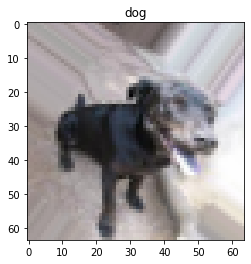

In [ ]:
example_x, example_y = train_datagen.flow(x_train, y_train, batch_size=1).next()
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(CLASSES[int(example_y[i])])
    plt.show()

Nous pouvons maintenant recréer notre modèle et relancer l'entraînement.

我们现在可以重新创建模型并再次训练。

In [ ]:
model = Sequential()
# A COMPLETER
# RECOPIER LE MODELE PRECEDENT
# A COMPLETER
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 丢弃率, 防止过拟合

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 防止过拟合

model.add(Conv2D(96, (3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 防止过拟合

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25)) # 防止过拟合

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(1, activation='sigmoid'))   # Couche de sortie

model.summary()

# AJOUTER EGALEMENT LA FONCTION DE COUT
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=50,
                    )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 96)        

### Analyse des résultats
### 结果分析

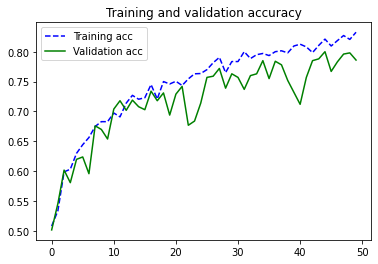

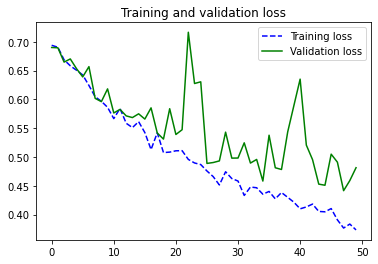

In [ ]:
plot_training_analysis()

On voit clairement sur les courbes que l'on a limité le sur-apprentissage. Notez aussi d'ailleurs, et c'est important, que l'apprentissage est plus lent : le modèle met plus de temps à prédire correctement l'ensemble d'apprentissage. C'est normal, car on a en quelque sorte "complexifié le problème" en introduisant toutes ces déformations de nos images.
Cette forme de régularisation "par les données" s'ajoute aux autres méthodes que nous avons vues précédemment comme la régularisation L1/L2 des poids du réseau et le Dropout.  

我们可以在曲线上清楚地看到我们限制了过度拟合。 另外我们发现，训练速度较慢：模型需要更长的时间才能正确预测训练集。 这是正常的，因为我们通过引入图像的所有这些扭曲以某种方式“使问题复杂化”。这种形式的“数据”正则化是我们之前看到的其他方法的补充，例如网络权重的 L1/L2 正则化和 Dropout。

Vous devriez maintenant atteindre des performances autour de 80% de précision sur l'ensemble de validation, ce qui est bien mais pas complètement satisfaisant : il faudrait pour continuer à s'améliorer probablement s'entraîner plus longtemps, mais également disposer de plus de données.

现在应该在验证集上实现 80% 左右的准确率，这很好，但并不完全令人满意：要继续改进，您可能需要训练更长时间，但也需要更多数据。

Une autre solution est d'utiliser le **Transfer Learning**.

另一种解决方案是使用**Transfer Learning** (迁移学习)。

## Transfer learning
## 迁移学习

L'une des raisons qui peut expliquer le fait que nos résultats soient décevants est que les premières couches de notre réseau convolutif, sensées détecter des caractéristiques utiles pour discriminer chiens et chats, n'ont pas appris de filtres suffisamment généraux à partir des 2000 images d'entraînement. Ainsi, même si ces filtres sont pertinents pour les 2000 images d'entraînement, il y a en fait assez peu de chances que ces filtres puissent bien fonctionner pour la généralisation sur de nouvelles données.

在我们的卷积网络的第一层中，本应检测有用的特征以区分狗和猫，没有从 2000 张图像中学习足够通用的过滤器。 因此，即使这些过滤器与 2000 个训练图像相关，这些过滤器实际上也不太可能很好地用于新数据的泛化。

C'est la raison pour laquelle nous avons envie de réutiliser un réseau pré-entrainé sur une large base de données, permettant donc de détecter des caractéristiques qui généraliseront mieux à de nouvelles données.

使用迁移学习的根本原因是数据量不够，导致其训练的模型在训练集上过拟合。此时就要拿出一个在相关领域，已经训练得很好的模型，在它的基础上使用现有的小规模数据集进行二次训练调整，最终达到一个不错的性能

Dans cette partie, nous allons réutiliser un réseau célèbre, et d'ores et déjà entraîné sur la base de données ImageNet : le réseau VGG-16.

因此，在这一部分中，我们将重用一个著名的网络，并且已经在 ImageNet 数据库上进行了训练：VGG-16 网络。

Commençons par récupérer les couches de convolution de ce réseau, et s'en remémorer  la composition.

VGG16的网络结构如下所示,

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

Nous pouvons extraire les caractéristiques, apprises par le réseau de neurones sur ImageNet, de notre base de données d'image de chiens et de chat. L'intérêt, par rapport à la première partie, est qu'il aurait été presque impossible de déduire ces caractéristiques "générales" (trouvées sur une immense base de données) depuis notre base de données trop réduite de 2000 images. En revanche, ces caractéristiques générales devraient se révéler utiles pour notre classifieur.

我们可以从我们的狗和猫图像数据库中提取由 ImageNet 上的神经网络学习到的特征。 与第一部分相比，我们几乎不可能从2000 张图像数据集中推断出这些“一般”特征（通常需要在一个巨大的数据集中得到）。另一方面，这些一般特征应该对我们的分类器有用。

On peut lire sur la structure du réseau VGG résumée grâce à la fonction *summary* ci-dessus que le tenseur de sortie est de dimension $2 \times 2 \times 512$, autrement dit que le réseau prédit des caractéristiques de dimension $2 \times 2 \times 512$ à partir d'une image de taille $64 \times 64$.

由于上面的 *summary* 函数，我们可以阅读 VGG 网络的结构总结，输出张量的维度为 $2 \times 2 \times 512$, 换句话说，网络预测维度 $2 \times 2 \times 512$ 的特征大小为 $64 \times 64$ 的图像。

On va redimensionner cette sortie dans un vecteur de dimension $2048 = 2 \times 2 \times 512$.

我们将在维度为 $2048 = 2 \times 2 \times 512$ 的向量中调整此输出的大小。

In [ ]:
train_features = conv_base.predict(x_train)
train_features = np.reshape(train_features,(train_features.shape[0],2*2*512))

val_features = conv_base.predict(x_val)
val_features = np.reshape(val_features,(val_features.shape[0],2*2*512))

Nous pouvons maintenant définir un réseau de neurones simple (par exemple, de 2 couches denses, avec 256 neurones sur la couche cachée)  qui va travailler directement sur les caractéristiques prédites par VGG.

我们现在可以定义一个简单的神经网络（例如，2 个全联接层，隐藏层上有 256 个神经元），它将直接作用于 VGG 预测的特征。

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

# A COMPLETER
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))   # Couche dense, à 256 neurones
model.add(Dense(1, activation='sigmoid'))   # Couche de sortie


model.summary()

# AJOUTER EGALEMENT LA FONCTION DE COUT
model.compile(optimizer=optimizers.Adam(lr=3e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# COMPLETER AVEC LES TENSEURS SUR LESQUELS EFFECTUER L'APPRENTISSAGE
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(x_val, y_val))

ValueError: ignored

In [ ]:
plot_training_analysis()

On observe à nouveau beaucoup de sur-apprentissage. Il faudrait trouver un moyen d'intégrer de l'augmentation de données. 

依旧过拟合。 我们必须找到一种方法来集成数据增强。

Pour cela, on peut connecter notre petit réseau de neurones à l'extrémité de la base convolutionnelle de VGG. L'idée est qu'en réutilisant notre générateur de données augmentées, nous pourrons calculer les caractéristiques de VGG sur les données augmentées, et ainsi classifier ces caractéristiques plutôt que les caractéristiques de notre base de données uniquement.

为此，我们可以将我们的小型神经网络连接到 VGG 卷积基的末端。 这个想法是，通过重用我们的增强数据生成器，我们将能够计算增强数据上的 VGG 特征，从而对这些特征进行分类，而不仅仅是对我们数据库的特征进行分类。

## Intégration de l'augmentation de données
## 数据增强

### Définition du nouveau modèle et entrainement
### 新模型的定义和训练

On commence par créer un nouveau modèle qui va s'appuyer sur la base convolutive de VGG, à laquelle on adjoint une couche dense et notre couche de sortie.

我们首先创建一个新模型，该模型将基于 VGG 的卷积基础，我们添加一个全联接层和我们的输出层。

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               524544    
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 15,239,489
Trainable params: 15,239,489
Non-trainable params: 0
_________________________________________________________________


**Attention** : il est important de ne pas commander l'entraînement de la base convolutionnelle de VGG ! Nous ne voulons en aucun cas écraser les bonnes caractéristiques de VGG que nous cherchons justement à réutiliser ! Le réseau aurait en outre un grand nombre de paramètres, ce qui est justement ce que l'on veut éviter ! 

Pour cela nous pouvons utiliser l'attribut *trainable* : en le positionnant à *false*, nous pouvons geler les poids et en empêcher la mise à jour pendant l'entraînement.

1. 从先前训练过的模型中获取图层。
2. 冻结它们，以免在以后的训练中破坏它们包含的任何信息。
3. 在冻结层的顶部添加一些新的可训练层。他们将学习将旧功能转变为对新数据集的预测。
4. 在数据集上训练新图层。

最后一个可选步骤是微调（fine-tuning），包括取消冻结上面获得的整个模型（或模型的一部分），并以非常低的学习率对新数据进行重新训练。通过将预训练的功能逐步适应新数据，可以潜在地实现有意义的改进。

图层和模型还具有可训练的布尔属性。 其值可以更改。 将`layer.trainable`设置为`False`会将图层的所有权重从可训练变为不可训练。 这称为“冻结”层：冻结层的状态在训练期间不会更新（无论是使用`fit()`进行训练，还是使用依赖于`trainable_weights`来应用梯度更新的任何自定义循环进行训练）。


In [ ]:
conv_base.trainable = False
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               524544    
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 15,239,489
Trainable params: 524,801
Non-trainable params: 14,714,688
_________________________________________________________________


Observez le décompte des poids : le nombre de poids entraînable est maintenant de 500 000, contre 16 millions précédemment ; on ne va entrainer ici que les poids de notre couche dense et de la couche de sortie.

观察`Trainable params`：现在是 500,000，高于之前的 1600 万; 我们将在这里只训练全联接层和输出层。

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=10,
                    )

Epoch 1/10
200/200 [==============================] - 8s 35ms/step - loss: 0.6107 - accuracy: 0.6715 - val_loss: 0.4767 - val_accuracy: 0.7860
Epoch 2/10
200/200 [==============================] - 7s 33ms/step - loss: 0.5251 - accuracy: 0.7365 - val_loss: 0.4911 - val_accuracy: 0.7710
Epoch 3/10
200/200 [==============================] - 7s 33ms/step - loss: 0.5227 - accuracy: 0.7355 - val_loss: 0.4952 - val_accuracy: 0.7510
Epoch 4/10
200/200 [==============================] - 7s 34ms/step - loss: 0.4996 - accuracy: 0.7530 - val_loss: 0.4665 - val_accuracy: 0.7770
Epoch 5/10
200/200 [==============================] - 7s 33ms/step - loss: 0.4991 - accuracy: 0.7545 - val_loss: 0.4586 - val_accuracy: 0.7810
Epoch 6/10
200/200 [==============================] - 7s 33ms/step - loss: 0.4782 - accuracy: 0.7660 - val_loss: 0.4692 - val_accuracy: 0.7700
Epoch 7/10
200/200 [==============================] - 6s 31ms/step - loss: 0.5067 - accuracy: 0.7500 - val_loss: 0.4618 - val_accuracy: 0.7750

### Analyse des résultats du nouveau modèle
### 结果分析

L'entraînement est beaucoup plus lent ! Il faut en effet générer les données augmentées, et leur faire traverser les couches de VGG à chaque itération de gradient. Ceci prend du temps !

训练速度慢很多！确实有必要生成增强数据，并使它们在每次梯度迭代时穿过 VGG 层。这需要时间！

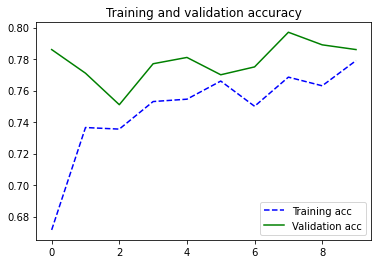

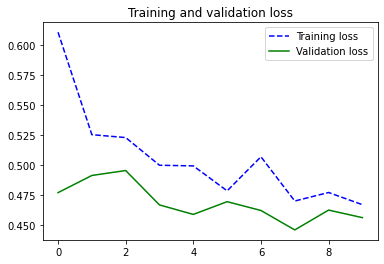

In [ ]:
plot_training_analysis()

En revanche, on observe que l'on a bien limité le sur-apprentissage, ce qui était le but recherché. Les résultats sont un peu meilleurs mais pas complètement satisfaisants.

另一方面，我们观察到我们有效地限制了过拟合，这是预期的目标。 结果稍微好一点，但并不完全令人满意。

### Fine-tuning


Nous pouvons maintenant tester la dernière technique vue en cours : le **fine-tuning**. Pour cela, nous allons repartir du réseau que nous venons d'entraîner, mais nous allons débloquer l'entraînement des poids de l'ensemble du réseau. **ATTENTION : il est important de choisir un taux d'apprentissage très faible afin de ne pas réduire à néant les bénéfices des entraînements précédents.** L'objectif est simplement de faire évoluer les paramètres du réseau "à la marge", et ceci ne peut être fait qu'après la première étape de *transfer learning* précédente. Sans cela, les dernières couches ajoutées à la suite de la base convolutive, après leur initialisation aléatoire, auraient engendré de forts gradients qui auraient complètement détruit les filtres généraux de VGG.



On commence par réactiver l'entraînement des paramètres de la base convolutive de VGG : 

In [ ]:
conv_base.trainable = True
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 256)               524544    
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 15,239,489
Trainable params: 15,239,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5), # Taux d'apprentissage réduit pour ne pas tout casser, ni risquer le sur-apprentissage !
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=10,
                    )

Epoch 1/10
200/200 [==============================] - 17s 76ms/step - loss: 0.5701 - accuracy: 0.6885 - val_loss: 0.5062 - val_accuracy: 0.7470
Epoch 2/10
200/200 [==============================] - 15s 74ms/step - loss: 0.4331 - accuracy: 0.7970 - val_loss: 0.3938 - val_accuracy: 0.8300
Epoch 3/10
200/200 [==============================] - 15s 74ms/step - loss: 0.3845 - accuracy: 0.8260 - val_loss: 0.3728 - val_accuracy: 0.8490
Epoch 4/10
200/200 [==============================] - 15s 74ms/step - loss: 0.3274 - accuracy: 0.8600 - val_loss: 0.3761 - val_accuracy: 0.8390
Epoch 5/10
200/200 [==============================] - 15s 74ms/step - loss: 0.3056 - accuracy: 0.8700 - val_loss: 0.3326 - val_accuracy: 0.8630
Epoch 6/10
200/200 [==============================] - 15s 75ms/step - loss: 0.2989 - accuracy: 0.8705 - val_loss: 0.2819 - val_accuracy: 0.8830
Epoch 7/10
200/200 [==============================] - 15s 73ms/step - loss: 0.2843 - accuracy: 0.8790 - val_loss: 0.2698 - val_accuracy:

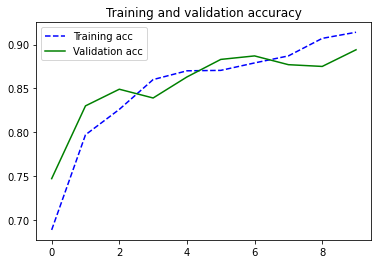

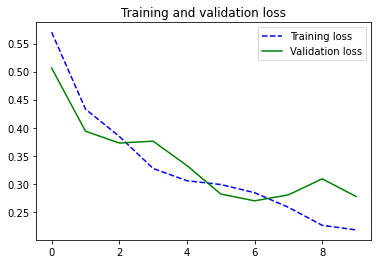

In [ ]:
plot_training_analysis()

On atteint un bon résultat, proche des 90% de précision sur l'ensemble de validation, bien au-dessus des performances obtenues sans *transfer learning* ! Vous comprenez maintenant pourquoi en traitement d'image, cette technique est incontournable.

**S'il vous reste du temps** :

Vous pouvez maintenant reprendre le travail depuis le début en augmentant la résolution des images (par exemple $128 \times 128$). A l'issue du *transfer learning* et du *fine-tuning*, vous devriez dépasser les 95\% de précision sur l'ensemble de validation. 

